In [ ]:
#NOMOR 2

#MATRIKS A
A = [
    [1  , 5  , 6   , 7  , 21],
    [81 , 45 , 12  , 31 , 54],
    [-1 , 76 , 123 , 12 , 99],
    [12 , 34 , 41  ,124 ,31],
    [-21,423 ,411  , 92 ,22]
]

#MATRIKS B
B= [
    [4    , 51 , 26 , 31   , 81],
    [81   , 45 , 12 , 31   , 618],
    [-1111, -91, -31, 161  , 90],
    [-213 , 0  , 11 , -123 , 31],
    [1    , 123, 31 , 91   , 22]
]

#FUNGSI PERKALIAN MATRIKS 5x5
def kali(matriks1,matriks2):
    AxB=[[0,0,0,0,0],
         [0,0,0,0,0],
         [0,0,0,0,0],
         [0,0,0,0,0],
         [0,0,0,0,0]]  #BUAT DUMMY MATRIKS DULU (belum dioperasi)
    
    for baris in range(5):
        for kolom in range(5):
            for jalan in range(5):
                AxB[baris][kolom] += matriks1[baris][jalan]*matriks2[jalan][kolom]
    return AxB

#FUNGSI TRANSPOS MATRIKS 
def transpos(matriks):
    dummy= [[0,0,0,0,0],
            [0,0,0,0,0],
            [0,0,0,0,0],
            [0,0,0,0,0],
            [0,0,0,0,0]] #BUAT DUMMY MATRIKS
    
    for baris in range(5):
        for kolom in range(5):
            dummy[kolom][baris]= matriks[baris][kolom] #baris jadi kolom, kolom jadi baris
    
    return dummy

#FUNGSI INVERS MATRIX (METODE GAUSS-JORDAN)
#Buat Matriks Identitas
def identitas():
    I = []
    # Nambahin elemen per baris
    for row in range(5):
        baris = []
        # Loop kolom
        for col in range(5):
            # Kalau indeks baris = indeks kolom --> elemen 1
            if row == col:
                baris.append(1)
            else:
                baris.append(0)
        I.append(baris)
    return I

#Gabungkan Matriks A dengan Matriks Identitas
def Gabungan(A, I):
    gabungan = []
    for row in range(5):
        baris = []
        # Salin elemen matriks A
        for col in range(5):
            baris.append(A[row][col])
        # Salin elemen matriks identitas
        for col in range(5):
            baris.append(I[row][col])
        gabungan.append(baris)
    return gabungan

#Fungsi Utama
def inverse(A):
    # Matriks identitas
    I = identitas()
    # Gabungan Matriks A dengan Matriks identitas
    M = Gabungan(A, I)

    for i in range(5):
        pivot = M[i][i] # Diagonal Utama
        
        # Kalo pivot = 0, Tukar baris
        if pivot == 0:
            found = False
            for k in range(i + 1, 5): # Cari elemen se kolom yang bukan nol
                if M[k][i] != 0:
                    # Kalo ketemu, tukar baris
                    dummy = M[i] # Tempat nyimpen baris sementara
                    M[i] = M[k]
                    M[k] = dummy 
                    pivot = M[i][i] # Karena elemen bukan nol, maka dijadiin pivot
                    found = True # Ada pivot pengganti
                    break
            # Kalo ga ada pivot pengganti
            if found == False:
                return None #Matriks tidak bisa di inverse
            
        for j in range(10):
            M[i][j] = M[i][j] / pivot # Membuat pivot = 1
        for k in range(5):
            if k != i:
                factor = M[k][i] # Elemen Sekolom pivot
                for l in range(10):
                    M[k][l] = M[k][l] - factor * M[i][l] # Nol kan sekolom selain pivot

    # Ambil bagian kanan sebagai invers
    inverse = []
    for i in range(5):
        row = []
        for j in range(5, 10):
            row.append(M[i][j])
        inverse.append(row)
    return inverse


#-------------------------------------------------------------------------------------
#FORMAT MATRIKS (Biar rapi aja)
def Matriks(m):
    for i in range(5):
        print(m[i])

#AxB
AB= kali(A,B)
print("--- AB ---")
Matriks(AB)

#BxA
BA= kali(B,A)
print("--- BA ---")
Matriks(BA)

#Atranspos x B
At= transpos(A)
AtB= kali(At,B) 
print("--- AtB ---")
Matriks(AtB)

#Btranspos x A
Bt= transpos(B)
BtA= kali(Bt,A)
print("--- BtA ---")
Matriks(BtA)

#Ainverse x B
Ainv = inverse(A)
AinvB = kali(Ainv,B)
print("--- AinvB ---")
Matriks(AinvB)
#Binverse x A
Binv = inverse(B)
BinvA = kali(Binv,A)
print("--- BinvA ---")
Matriks(BinvA)


--- AB ---
[-7727, 2313, 628, 2202, 4390]
[-15912, 11706, 4289, 6939, 37600]
[-132958, 4353, 274, 29661, 60507]
[-69130, 2224, 1774, -4404, 30200]
[-442016, -16731, -6517, 69319, 300039]
--- BA ---
[2780, 39608, 38396, 13217, 8155]
[-8892, 265810, 257771, 62806, 19876]
[-8409, 31538, 32020, 17274, -24343]
[-2351, 8702, 7773, -13759, -6515]
[10563, 20296, 18068, 17500, 13037]
--- AtB ---
[5099, 1204, 510, -1006, 49959]
[-87590, 47393, 11801, 48097, 45415]
[-143979, 40206, 9679, 52719, 29285]
[-37113, 11976, 4398, -3770, 26673]
[-112112, -2802, -852, 16453, 45428]
--- BtA ---
[5099, -87590, -143979, -37113, -112112]
[1204, 47393, 40206, 11976, -2802]
[510, 11801, 9679, 4398, -852]
[-1006, 48097, 52719, -3770, 16453]
[49959, 45415, 29285, 26673, 45428]
--- AinvB ---
[-10.36000119251631, -4.562445274522989, -2.220594193539705, -0.9472847421263935, 2.304883587422711]
[24.450258412085176, 7.5185334607456085, 3.25742219574275, 1.2772686179151571, 6.658553233261706]
[-25.94558234784335, -7.885

In [ ]:
#NOMOR 3
sebelum= 0
# for i in range(1,100+1): #i= 1 sampai 100
#     for j in range(1,i+1): #j= 1 sampai i
#         for k in range(1,j+1): #k= 1 sampai j
#             sebelum+= 2026*i*j*k - 2025*i*(j**2)*(k**3)
i= 1
while i<=100:
    j=1
    while j<=i:
        k=1
        while k<=j:
            sebelum+= 2026*i*j*k - 2025*i*(j**2)*(k**3)
            k+=1 # biar k>j (loop berhenti)
        j+=1 #biar j>i (loop berhenti)
    i+=1 #lanjut iterasi selanjutnya, sampai 100

hasil=sebelum #Setelah operasi
print(hasil)

-8963626198020299750


In [31]:
#NOMOR 4
memo= {}
def f(n):
    if n == 0:
        return 1
    if n < 0:
        return 0
    if n in memo: #memorization, agar rekursif tidak terlalu banyak
        return memo[n]
    else:
        nilai=0 #belum dieksekusi
        for k in range(1,n+1):
            nilai+=(k**2)*f(n-k)    
        memo[n]= nilai
        return nilai
print(f(100))

1468009539418823987285328481515214168599160242898084223


In [37]:
#NOMOR 5
#KASUS 1: Akar2 dari 3
def akar2_3(x):
    #misal x= akar2 dari 3
    #      x^2= 3
    #      x^2-3= 0 -->(f(x))
    return x**2-3
def dif_akar2_3(x):
    return 2*x #--> turunan dari x^2-3

#KASUS 2: Akar3 dari 3
def akar3_3(x):
    #misal x= akar 3 dari 3
    #      x^3= 3
    #      x^3-3= 0 -->(f(x))
    return x**3-3
def dif_akar3_3(x):
    return 3*(x**2) #--> turunan dari x^3-3

#RUMUS Newton-Raphson (Asumsi epsilon= 1.5 untuk kedua kasus)
def newton_raphson(f,df,epsilon=1.5,toleransi_beda= 0.0000001, iterasi_max=100):
    x= epsilon
    iterasi= 0
    while iterasi<iterasi_max:
        fx=f(x)
        d_fx=df(x)
        x_baru = x- fx/d_fx #--> rumus newton-raphson

        if abs(x_baru-x)<=toleransi_beda:
            return x_baru
        
        x= x_baru
        iterasi+=1
    return x

kasus1= newton_raphson(akar2_3,dif_akar2_3)
print(kasus1)
kasus2= newton_raphson(akar3_3,dif_akar3_3)
print(kasus2)

1.7320508075688772
1.4422495703074083


In [ ]:
#NOMOR 6

#UNTUK A
def a(t): 
    return (1+1/t)**t

def inf_limit(fungsi, toleransi_beda= 0.0000001):
    t=1
    acuan= 0
    while True:
        if abs(fungsi(t) - acuan) > toleransi_beda: #kalau f(t) sekarang - f(t)sebelumnya > toleransi beda, maka lanjut iterasi
            acuan = fungsi(t)
            t+=1
        else:
            break
    return acuan

#UNTUK B
def b(k):
    return (1/(k)**2)
def deret_limit(fungsi, toleransi_beda= 0.0000001):
    k=1
    acuan= 0
    while True:
        baru= acuan+fungsi(k)
        if abs(baru-acuan)> toleransi_beda: #kalau total sesudah-total sebelum masih kurang dari toleransi beda, maka lanjut iterasi
            acuan= baru
            k+=1
        else:
            break
    return acuan


A = inf_limit(a)
B = deret_limit(b)
print(A)
print(B)
#SOAL
nilai = A+6*B
print(nilai)

2.7179131895551913
1.6446178613172713
12.585620357458819


In [1]:
#NOMOR 7
import numpy as np

Cd= np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,1.2])
Cl= np.array([0.0318,0.0341,0.0372,0.0413,0.0462,0.0521,0.0588,0.075,0.0948])

#Cd= Cd0 + kCl^2
#Y= a+ bX
# maka, Cd0= a , k=b , Cl^2=X


#Pelurusan
X= Cl**2
Y= Cd

koef= np.polyfit(X,Y,1)
b,a = koef

#Persamaan
#Nilai Cd0 dan k
Cd0 = a
print(f"Cd0: {Cd0}")
k = b
print(f"k: {k}")
print(f"--- Persamaan ---\nCd = {a} + {k}*Cl^2")

Cd0: 0.2668399563121596
k: 117.04105197946355
--- Persamaan ---
Cd = 0.2668399563121596 + 117.04105197946355*Cl^2


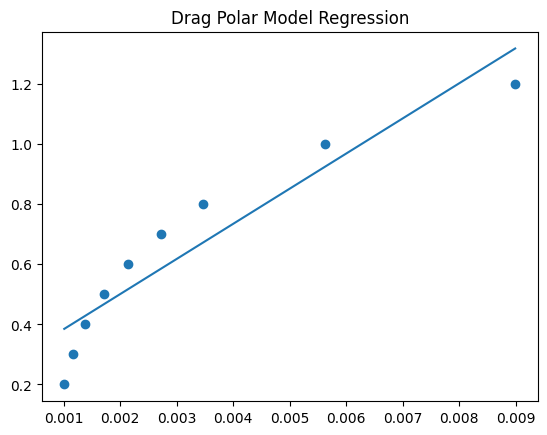

In [52]:
#SEKALIAN GRAFIK, hehe
import matplotlib.pyplot as plt
#predicted values
Y_pred = a+b*X

#Representasi plot
plt.scatter(X, Y) #--> Menampilkan persebaran X dan Y
plt.plot(X, Y_pred) #--> Buat Grafik
plt.title("Drag Polar Model Regression") #--> Judul
plt.show() #--> Menampilkan plot